<a href="https://colab.research.google.com/github/khanhvy31/CIS545_Recitation/blob/main/Insurance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import All important packages


In [18]:
# import packages
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%%capture
!pip install kaggle

In [4]:
# Create the kaggle directory and
# (NOTE: Do NOT run this cell more than once unless restarting kernel)
!mkdir ~/.kaggle

In [5]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [6]:
# Download dataset
!!kaggle datasets download -d annantkumarsingh/health-insurance-cross-sell-prediction-data

["Warning: Looks like you're using an outdated API Version, please consider updating (server 1.6.15 / client 1.6.14)",
 'Dataset URL: https://www.kaggle.com/datasets/annantkumarsingh/health-insurance-cross-sell-prediction-data',
 'License(s): CC0-1.0',
 'Downloading health-insurance-cross-sell-prediction-data.zip to /content',
 '',
 '  0% 0.00/6.20M [00:00<?, ?B/s]',
 '',
 '100% 6.20M/6.20M [00:00<00:00, 78.2MB/s]']

In [7]:
# Unzip folder in Colab content folder
!unzip /content/health-insurance-cross-sell-prediction-data.zip

Archive:  /content/health-insurance-cross-sell-prediction-data.zip
  inflating: test.csv                
  inflating: train.csv               


# EDA & Preprocessing

This tutorial will focus on the machine learning end-to-end pipeline, therefore, we will skim through the EDA part

In [12]:
df = pd.read_csv("train.csv")

In [13]:
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [14]:
#turn Gender, Vehical Damage to dummy variable
df = pd.get_dummies(df, columns = ['Gender','Vehicle_Damage'],dtype = int)

In [25]:
#turn vehical_age to ordinal feature
enc = OrdinalEncoder()
df['encoded_vehical_age'] = enc.fit_transform(df[['Vehicle_Age']])

In [27]:
df.drop(columns = 'Vehicle_Age',inplace = True)

# Check Balance of target variable

<Axes: ylabel='count'>

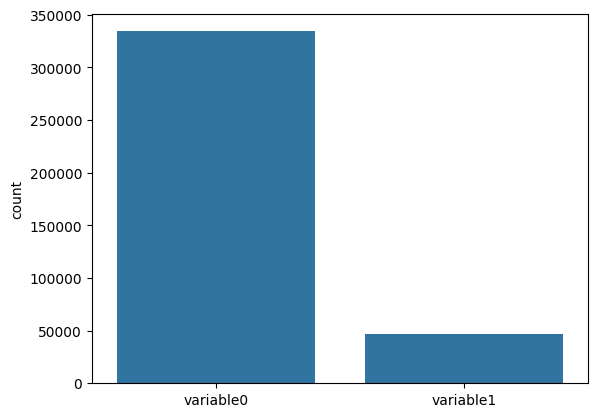

In [36]:
variable1 = df['Response'].sum()
variable0 = df['Response'].count() - df['Response'].sum()
sns.barplot(x = ['variable0','variable1'], y = df['Response'].value_counts())

In [38]:
#Calculate the %of variable 0 compare to variable 1
pct_variable =  variable0/(df['Response'].count())*100
print(f'percentage of variable 0: {pct_variable}')

percentage of variable 0: 87.74366388618479


The model will easily achieve 87.7% of accuracy by always predicting 0

## Randomly oversampling

Response
0    334399
1     46710
Name: count, dtype: int64